In [2]:
%matplotlib inline

# A Journey through Prudential
Author: BobC
Date: Dec 16, 2015

Inspired by https://www.kaggle.com/omarelgabry/rossmann-store-sales/a-journey-through-rossmann-stores

In [1]:
# Imports

#utils
import os
import pylab

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
# read the datasets (only looking at train for now)
train  = pd.read_csv("dataset/train.csv")

#test      = pd.read_csv("../input/test.csv")


## Class Imbalance

Class imbalance is something to be aware of when training.

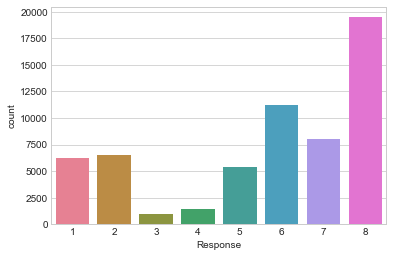

In [6]:
sns.countplot(x='Response',data=train,palette="husl", order = range(1,9))

## Missing Data

There's a lot of missing data.   Let's take a look

First, let's find the columns with missing data.  As you can see, only 1% of the rows for Medical_History_10 have values

In [7]:
# Let's look at the size of the train dataset

print("train:  nrows %d, ncols %d" % train.shape)

train:  nrows 59381, ncols 128


In [8]:
# List features with missing values

print("%20s \tCount \tPct missing" % 'Feature')
for column_name, column in train.transpose().iterrows():
    naCount = sum(column.isnull())
    if naCount > 0:
       #print column_name, naCount, "Percent missing: %f%%" % 100.*naCount/train.shape[0]
       print("%20s \t%5d  \t%2.2f%%" % (column_name, naCount, 100.*naCount/train.shape[0]))

             Feature 	Count 	Pct missing
   Employment_Info_1 	   19  	0.03%
   Employment_Info_4 	 6779  	11.42%
   Employment_Info_6 	10854  	18.28%
 Insurance_History_5 	25396  	42.77%
       Family_Hist_2 	28656  	48.26%
       Family_Hist_3 	34241  	57.66%
       Family_Hist_4 	19184  	32.31%
       Family_Hist_5 	41811  	70.41%
   Medical_History_1 	 8889  	14.97%
  Medical_History_10 	58824  	99.06%
  Medical_History_15 	44596  	75.10%
  Medical_History_24 	55580  	93.60%
  Medical_History_32 	58274  	98.14%




### Plots for those variables with large amounts of missing data


#### Employment History


Text(0,0.5,'Count')

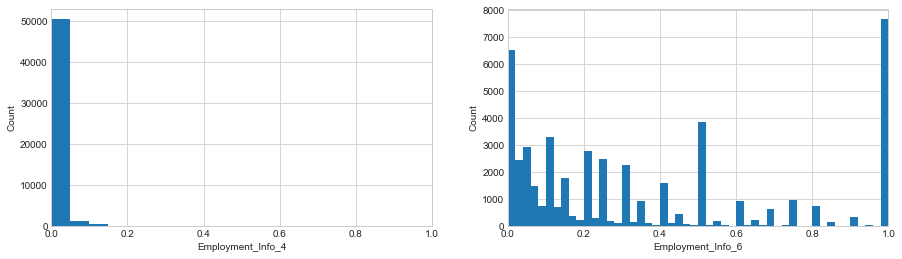

In [9]:
# Plot distributions for Employment_Info_4 and Employment_Info_6

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
train["Employment_Info_4"].plot(kind='hist',bins=20,xlim=(0,1),ax=axis1)
axis1.set_xlabel("Employment_Info_4")
axis1.set_ylabel("Count")
train["Employment_Info_6"].plot(kind='hist',bins=50,xlim=(0,1),ax=axis2)
axis2.set_xlabel("Employment_Info_6")
axis2.set_ylabel("Count")

Interesting distribution for *Employment_Info_6* (above)


### Insurance History

*Insurance_History_5* has a few large outliers, otherwise most of the data is is less than 0.02.  The data appears to be quantized

In [10]:
# Is there anything to learn in the data quantization for Insurance_History_5?

x = min(train["Insurance_History_5"][train["Insurance_History_5"]>0])
print("Min value > 0: %e   1/(Min value > 0) %f" % (x,1./x))

Min value > 0: 6.670000e-09   1/(Min value > 0) 149925037.481259


In [11]:
# List all of the Insurance_History_5 values greater than 0.02  (Max is 1.0)

train["Insurance_History_5"][train["Insurance_History_5"]>0.02]

1043     0.133333
1442     0.033333
1511     0.023333
1985     0.023333
2061     0.078019
3270     0.033333
6980     0.033333
11841    0.026667
13129    0.040000
14520    0.026667
14655    0.029689
22408    0.033333
22455    0.033333
24372    0.033333
25077    0.066667
28786    0.033333
29825    0.031667
34043    0.026667
34291    0.033333
35723    1.000000
38258    0.033333
38279    0.033333
39022    0.491851
39605    0.033333
44091    0.033333
46630    0.040000
47245    0.640484
48957    0.023333
51146    0.033333
52596    0.026667
53456    0.023333
56685    0.040000
Name: Insurance_History_5, dtype: float64

Text(0,0.5,'Count')

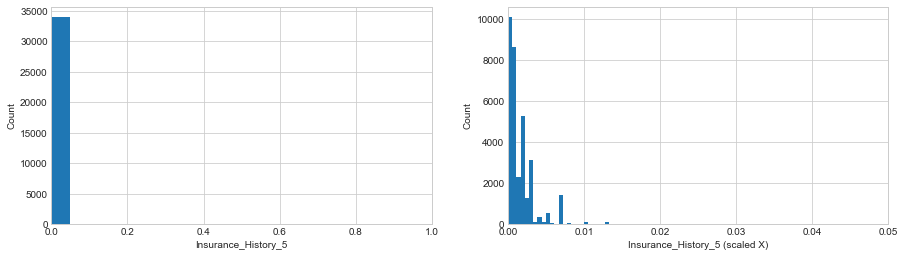

In [12]:
# Plot distribution for Insurance_History_5 with two different x-axis scalings

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
train["Insurance_History_5"].plot(kind='hist',bins=20,xlim=(0,1),ax=axis1)
axis1.set_xlabel("Insurance_History_5")
axis1.set_ylabel("Count")

train["Insurance_History_5"][train["Insurance_History_5"]<0.034].plot(kind='hist',bins=60,xlim=(0,.05),ax=axis2)
#np.log10(train["Insurance_History_5"]+1).plot(kind='hist',bins=100,ax=axis2)
axis2.set_xlabel("Insurance_History_5 (scaled X)")
axis2.set_ylabel("Count")

Text(0,0.5,'Count')

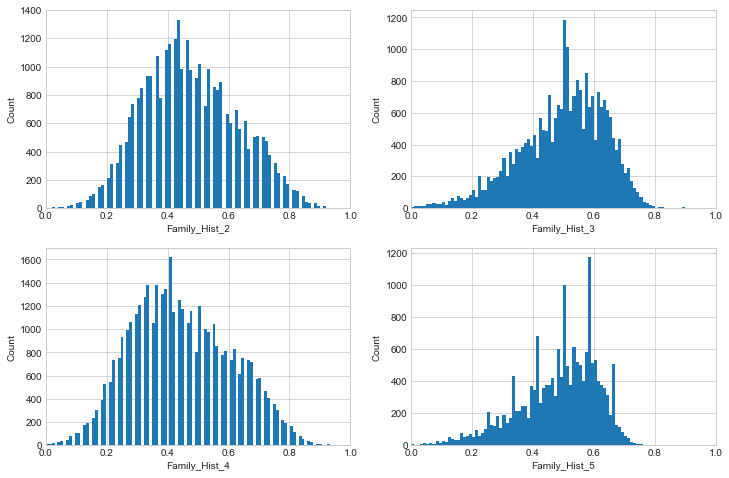

In [13]:
pylab.rcParams['figure.figsize'] = (12.0, 8.0)
fig, axisArr = plt.subplots(2,2)
train["Family_Hist_2"].plot(kind='hist',bins=100,xlim=(0,1),ax=axisArr[0,0])
axisArr[0,0].set_xlabel("Family_Hist_2")
axisArr[0,0].set_ylabel("Count")
train["Family_Hist_3"].plot(kind='hist',bins=100,xlim=(0,1),ax=axisArr[0,1])
axisArr[0,1].set_xlabel("Family_Hist_3")
axisArr[0,1].set_ylabel("Count")

train["Family_Hist_4"].plot(kind='hist',bins=100,xlim=(0,1),ax=axisArr[1,0])
axisArr[1,0].set_xlabel("Family_Hist_4")
axisArr[1,0].set_ylabel("Count")
train["Family_Hist_5"].plot(kind='hist',bins=100,xlim=(0,1),ax=axisArr[1,1])
axisArr[1,1].set_xlabel("Family_Hist_5")
axisArr[1,1].set_ylabel("Count")

In [14]:
# Multiplying the data by 71 turns Family_Hist_4 into integer data
# So the original data may have had a range of 0-71 (assuming the data hasn't been shifted)
train["Family_Hist_4"][1:10]*71

1     6.0
2    16.0
3    25.0
4    29.0
5    36.0
6    39.0
7     NaN
8    48.0
9     NaN
Name: Family_Hist_4, dtype: float64



### Medical History

Worth noting: *Medical History features with missing values aren't normalized. The max value is 240.*

Text(0,0.5,'Count')

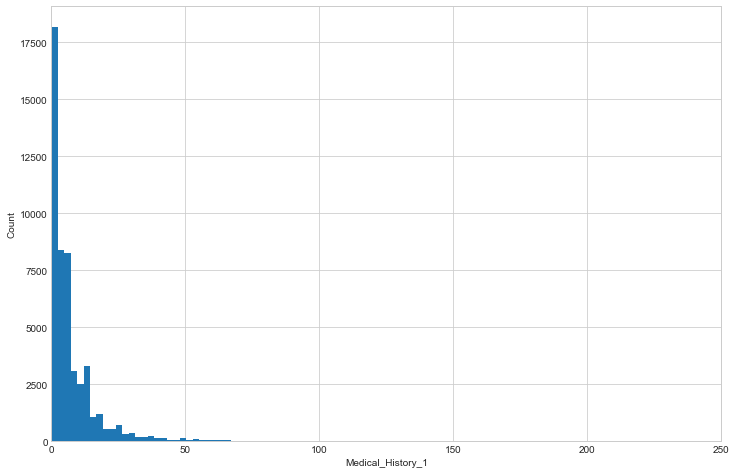

In [15]:
train["Medical_History_1"].plot(kind='hist',xlim=(0,250),bins=100)
plt.xlabel("Medical_History_1")
plt.ylabel("Count")

Text(0,0.5,'Count')

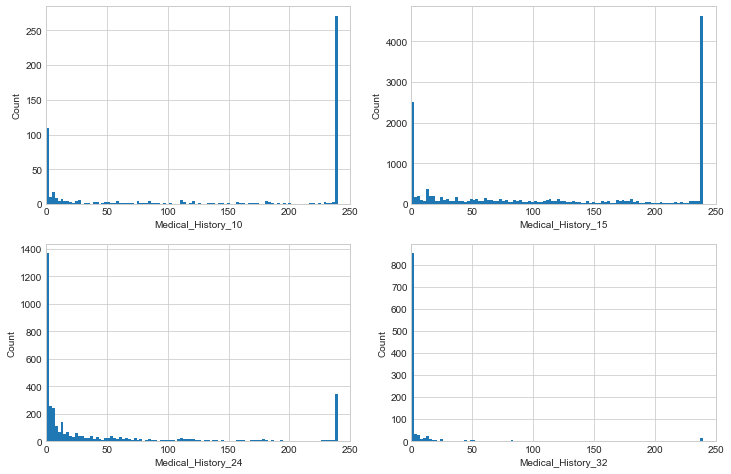

In [16]:
# Plot distributions for Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32

pylab.rcParams['figure.figsize'] = (12.0, 8.0)
fig, axisArr = plt.subplots(2,2)
train["Medical_History_10"].plot(kind='hist',bins=100,xlim=(0,250),ax=axisArr[0,0])
axisArr[0,0].set_xlabel("Medical_History_10")
axisArr[0,0].set_ylabel("Count")
train["Medical_History_15"].plot(kind='hist',bins=100,xlim=(0,250),ax=axisArr[0,1])
axisArr[0,1].set_xlabel("Medical_History_15")
axisArr[0,1].set_ylabel("Count")

train["Medical_History_24"].plot(kind='hist',bins=100,xlim=(0,250),ax=axisArr[1,0])
axisArr[1,0].set_xlabel("Medical_History_24")
axisArr[1,0].set_ylabel("Count")
train["Medical_History_32"].plot(kind='hist',bins=100,xlim=(0,250),ax=axisArr[1,1])
axisArr[1,1].set_xlabel("Medical_History_32")
axisArr[1,1].set_ylabel("Count")



## More Medical History Fun

The features below don't have missing values, but do have interesting distributions.  They appear to be binary, with somewhat arbitrary integer offsets and scalings.  This makes them somewhat different that the medical histories plotted above.  Those are binomial and appear to have continous values.

Text(0,0.5,'Count')

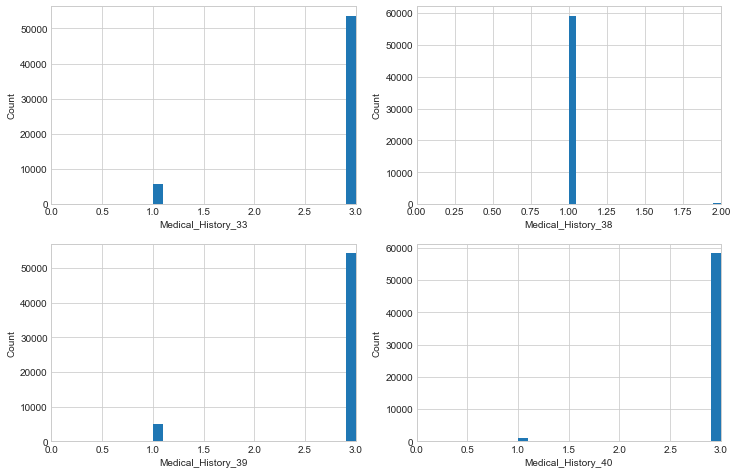

In [17]:
# Plot the distributions for Medical_History_33, Medical_History_38, Medical_History_39 and Medical_History_40

pylab.rcParams['figure.figsize'] = (12.0, 8.0)
fig, axisArr = plt.subplots(2,2)
train["Medical_History_33"].plot(kind='hist',bins=20,xlim=(0,3),ax=axisArr[0,0])
axisArr[0,0].set_xlabel("Medical_History_33")
axisArr[0,0].set_ylabel("Count")
train["Medical_History_38"].plot(kind='hist',bins=20,xlim=(0,2),ax=axisArr[0,1])
axisArr[0,1].set_xlabel("Medical_History_38")
axisArr[0,1].set_ylabel("Count")

train["Medical_History_39"].plot(kind='hist',bins=20,xlim=(0,3),ax=axisArr[1,0])
axisArr[1,0].set_xlabel("Medical_History_39")
axisArr[1,0].set_ylabel("Count")
train["Medical_History_40"].plot(kind='hist',bins=20,xlim=(0,3),ax=axisArr[1,1])
axisArr[1,1].set_xlabel("Medical_History_40")
axisArr[1,1].set_ylabel("Count")



## Product Info

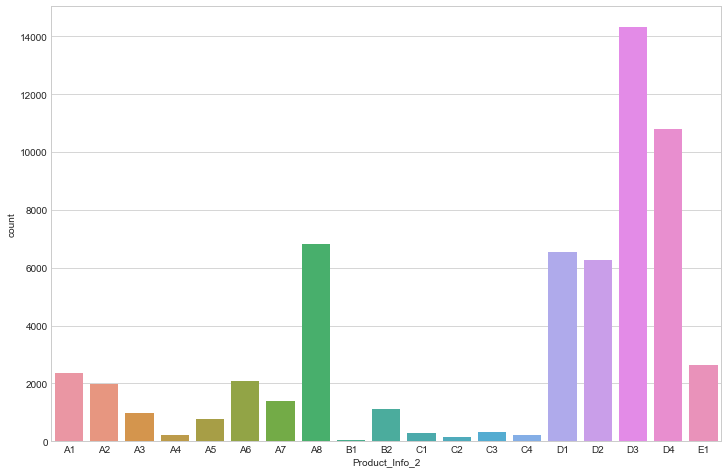

In [18]:
# Product_Info_2 is categorical with 19 categories

sns.countplot(x='Product_Info_2', data=train, 
              order=['A1','A2','A3','A4','A5','A6','A7','A8',
                     'B1','B2',
                     'C1','C2','C3','C4',
                     'D1','D2','D3','D4',
                     'E1'])

The following plots are of the same data broken out for each Response.  

Be careful when looking at these plots.  The response data doesn't have a uniform distribution, and these plots haven't been normalized for either the response distribution, or the Product_Info_2 distribution.  

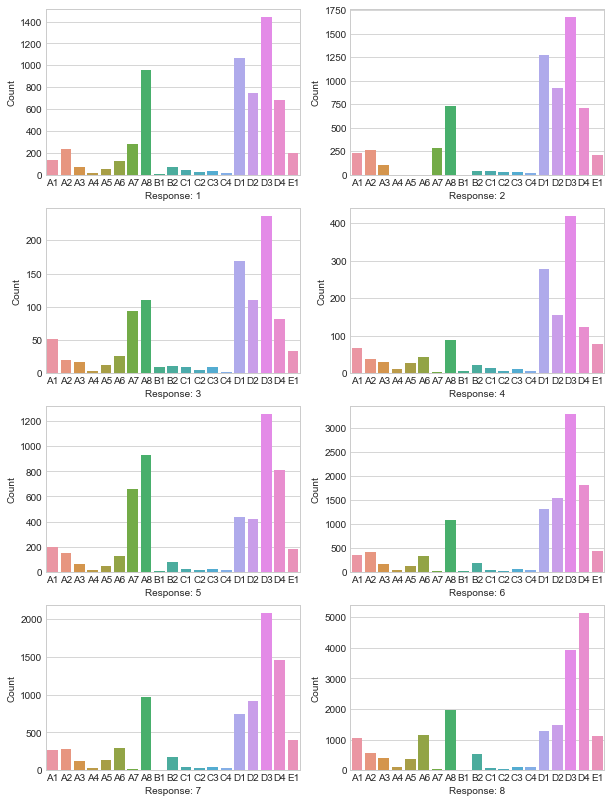

In [19]:
pylab.rcParams['figure.figsize'] = (10.0, 14.0)
f, axisarr = plt.subplots(4, 2)
for r in range(1,9):
    axs = axisarr[int((r-1)/2),(r-1)%2]
    sns.countplot(x='Product_Info_2', data=train[train["Response"]==r], 
              order=['A1','A2','A3','A4','A5','A6','A7','A8',
                     'B1','B2',
                     'C1','C2','C3','C4',
                     'D1','D2','D3','D4',
                     'E1'],ax=axs)
    axs.set_ylabel('Count')
    axs.set_xlabel('Response: '+str(r))



## Age vs Response

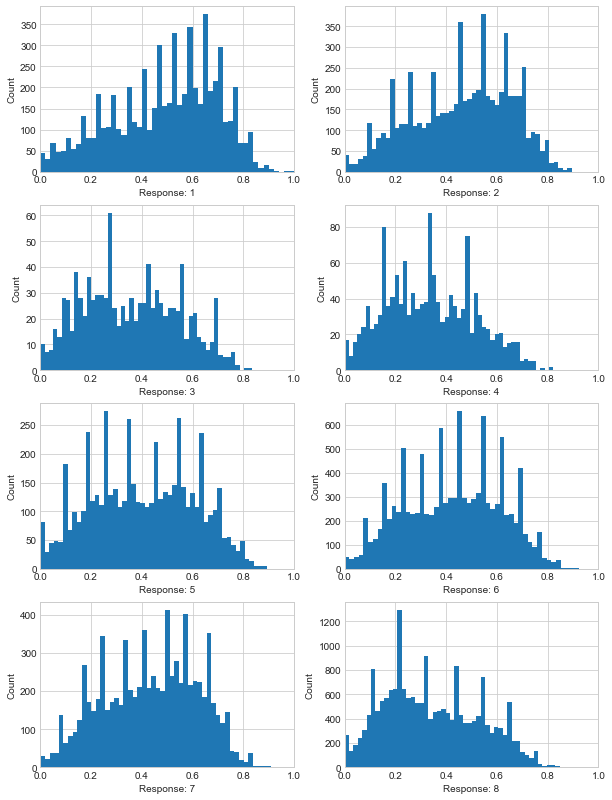

In [20]:
# Look at Responses as a function of age.   It's not surprising that responses differ as a function of age.

pylab.rcParams['figure.figsize'] = (10.0, 14.0)
f, axisarr = plt.subplots(4, 2)
for r in range(1,9):
    axs = axisarr[int((r-1)/2),(r-1)%2]
    train["Ins_Age"][train["Response"]==r].plot(kind='hist',bins=50,xlim=(0,1),ax=axs)
    axs.set_ylabel('Count')
    axs.set_xlabel('Response: '+str(r))